In [ ]:
import os
from google.colab import drive
from pathlib import Path
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix


working_dir = 'drive/MyDrive/Projet_IA' # chemin vers le dossier de travail 
data_dir='drive/MyDrive/Data_IA' # chemin vers le dossier data dans lequel sont déposés les dataset

def init_drive():
  # point de montage de google drive dans google colab
  drive.mount('drive', force_remount=True)
  # création du dossier de travail si celui-ci n'existe pas
  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

init_drive()


Mounted at drive


Vous disposez donc de 4 dataset labélisés : 

*   **Répartition homogème dans les classes** 

WellBalanced_TrainSet.csv : 240000 données (15000 de chaque classe)

WellBalanced_TestSet.csv : 80000 données (5000 de chaque classe)

*   **Répartition homogème dans l'espace des input** 

Representative_TrainSet.csv : 190040 données 

Representative_TestSet.csv : 524654 données






**Génération des tableaux entrées/sorties d'entraînement et de tests**

In [ ]:
import csv
import numpy as np
#importation des bases de donées
def load_datatraj(filename):
  Data=[]
  with open("{}/{}.csv".format(data_dir,filename),newline='') as f:
    reader = csv.reader(f,delimiter=',')
    for row in reader:
        Data.append(row)
  return(Data)
#importation de la base de données représentative d'entrainement
R_Train=load_datatraj('Representative_TrainSet')
print(np.shape(R_Train))

for i in range(5):
  print(R_Train[i])
print('\n')
#importation de la base de données représentative de test
R_Test=load_datatraj('Representative_TestSet')
print(np.shape(R_Test))

for i in range(5):
  print(R_Test[i])
#importation de la base de données éuilibré de test
WB_Test=load_datatraj('WellBalanced_TestSet')
print(np.shape(WB_Test))
#On imprime pour connaitre la position des informations utiles à l'entrainement ou à la vérification du résultat
for i in range(5):
  print(WB_Test[i])

(190041, 8)
['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Type']
['0', '-1.0', '-0.7777777777777778', '-0.5555555555555556', '1.0', '1.0', '1.0', '12.0']
['1', '-1.0', '-0.7777777777777778', '-0.5555555555555556', '1.0', '1.0', '0.9', '12.0']
['2', '-1.0', '-0.7777777777777778', '-0.5555555555555556', '1.0', '1.0', '0.8', '12.0']
['3', '-1.0', '-0.7777777777777778', '-0.5555555555555556', '1.0', '1.0', '0.7', '12.0']


(52465, 8)
['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Type']
['0', '-0.95', '-0.94', '-0.1378571428571429', '0.96', '0.97', '0.99', '12.0']
['1', '-0.95', '-0.94', '-0.1378571428571429', '0.96', '0.97', '0.86625', '12.0']
['2', '-0.95', '-0.94', '-0.1378571428571429', '0.96', '0.97', '0.7424999999999999', '8.0']
['3', '-0.95', '-0.94', '-0.1378571428571429', '0.96', '0.97', '0.61875', '8.0']
(80001, 10)
['', 'd', 'V init', 'A init', 'V max', 'A max', 'J max', 'Computation Time', 'Trajectory Time', 'Type']
['0', '-0.14197597873070844', '-0.91678

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn


WB_Test_entree = []
WB_Test_sortie = []
#conversion en float et on isole uniquement la classe dans WB_Test_sortie
for i in range(1, len(WB_Test)):
  WB_Test_sortie += [float(WB_Test[i][-1])]
  
  Ls2 = []
  #conversion en float et on isole uniquement les données d'entrainement dans WB_Test_entree
  for j in range(1,len(WB_Test[0])-3):
    Ls2 += [float(WB_Test[i][j])]

  WB_Test_entree += [Ls2]

for i in range(10):
  print(WB_Test_sortie[i],WB_Test_entree[i])



12.0 [-0.14197597873070844, -0.9167898906169702, 0.2783608184931674, 0.9424623014734514, 0.37910814388850633, 0.16310499482781016]
5.0 [-0.631679950165206, 0.080913533274528, 0.09435044943360332, 0.6054371308129851, 0.30043822080928306, 0.413602906747933]
2.0 [-1.269550511949212, 0.39051847920120586, -0.38318004551579266, 0.6435180547041414, 0.9687291123277154, 0.5626888683655237]
13.0 [0.4265158610491111, -0.5590323469688235, 0.2851649531728453, 0.7856062367586119, 0.37739756931417046, 0.9918986110636998]
0.0 [-1.265401668616024, -0.0388787828458631, -0.2086299706379069, 0.8117983581012135, 0.7925842673995179, 0.5471705174891809]
8.0 [0.38419084934704295, -0.40442958711103394, 0.5667984571809238, 0.7140882704575516, 0.9319930864822005, 0.6735930842612475]
8.0 [0.19278826895015788, -0.1760305092736668, -0.10082671461054754, 0.7598804091892112, 0.5384081118083758, 0.14399980245273925]
13.0 [-0.6414073572767751, -0.607619772628949, -0.16105778789360528, 0.8094025172364179, 0.168631074737

In [ ]:
R_Test_entree = []
R_Test_sortie = []

R_Train_entree = []
R_Train_sortie = []
#conversion en float et on isole uniquement la classe dans R_Test_sortie
for i in range(1, len(R_Test)):
  R_Test_sortie += [float(R_Test[i][-1])]
  
  Ls = []
  for j in range(1,len(R_Test[0])-1):
    Ls += [float(R_Test[i][j])]
  
  R_Test_entree += [Ls]
#conversion en float et on isole uniquement la classe dans R_Train_sortie
for i in range(1, len(R_Train)):
  R_Train_sortie += [float(R_Train[i][-1])]
  #conversion en float et on isole uniquement les données d'entrainement dans R_Train_entrée
  Ls = []
  for j in range(1,len(R_Train[0])-1):
    Ls += [float(R_Train[i][j])]
  
  R_Train_entree += [Ls]


for i in range(10):
  print(R_Test_sortie[i],R_Test_entree[i])

for i in range(10):
  print(R_Train_sortie[i],R_Train_entree[i])

12.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.99]
12.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.86625]
8.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.7424999999999999]
8.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.61875]
8.0 [-0.95, -0.94, -0.1378571428571429, 0.96, 0.97, 0.495]
0.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.99]
0.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.86625]
0.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.7424999999999999]
8.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.61875]
8.0 [-0.95, -0.94, 0.1378571428571428, 0.96, 0.97, 0.495]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 1.0]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 0.9]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 0.8]
12.0 [-1.0, -0.7777777777777778, -0.5555555555555556, 1.0, 1.0, 0.7]
8.0 [-1.0, -0.7777777777777778, -0.33333333333333337, 1.0, 1.0, 1.0]
8.0 [-1.0, -0.7777777777777778, -0.3

**Génération des couches de neurones**

In [ ]:
#mise en place du modèle
model = Sequential()
model.add(Dense(6, input_dim=6, activation='elu', name='Entree'))
model.add(Dense(54, activation='elu', name='Cachee1'))
model.add(Dense(30, activation='elu', name='Cachee2'))
model.add(Dense(16, activation='softmax', name='Sortie'))

**Entraînement et accuracy de l'IA**

In [ ]:
#on met en place les systèmes de mesure et de récompense de notre modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Cette fonction permet de rapporter notre sortie composée de 16 valeurs par prédiction (certitude par classe) sur une matrice colonne indiquant uniquement la classe retenue
R_Train_sortie_converted = np_utils.to_categorical(np.array(R_Train_sortie), 16)
#entraînement du réseaux de neurones
model.fit(np.array(R_Train_entree), R_Train_sortie_converted, epochs=400, batch_size=1024)

#permet l'affichage des résultats sur l'accuracy
scores = model.evaluate(np.array(R_Train_entree), R_Train_sortie_converted)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/400
186/186 [==============================] - 1s 4ms/step - loss: 1.7014 - accuracy: 0.4588
Epoch 2/400
186/186 [==============================] - 1s 4ms/step - loss: 0.9678 - accuracy: 0.6549
Epoch 3/400
186/186 [==============================] - 1s 4ms/step - loss: 0.7292 - accuracy: 0.7321
Epoch 4/400
186/186 [==============================] - 1s 4ms/step - loss: 0.5786 - accuracy: 0.7802
Epoch 5/400
186/186 [==============================] - 1s 4ms/step - loss: 0.5167 - accuracy: 0.8018
Epoch 6/400
186/186 [==============================] - 1s 4ms/step - loss: 0.4790 - accuracy: 0.8155
Epoch 7/400
186/186 [==============================] - 1s 4ms/step - loss: 0.4452 - accuracy: 0.8277
Epoch 8/400
186/186 [==============================] - 1s 4ms/step - loss: 0.4118 - accuracy: 0.8414
Epoch 9/400
186/186 [==============================] - 1s 4ms/step - loss: 0.3801 - accuracy: 0.8544
Epoch 10/400
186/186 [==============================] - 1s 4ms/step - loss: 0.3516 - accura

**Test de l'IA et matrice de confusion (WB test)**

In [ ]:
y_pred = model.predict(np.array(WB_Test_entree))
Y_pred = np.argmax(y_pred, 1)

cm1 = confusion_matrix(WB_Test_sortie, Y_pred)
print(cm1)

[[4763   17   24    2   27    2    1    0   90    3   70    1    0    0
     0    0]
 [ 137 4542    0   23    0  115    0    0    1   10    0    0  117   55
     0    0]
 [ 286    1 4614    8    9    0   39    0    0    0   43    0    0    0
     0    0]
 [   4  234  422 4045    0   13   23  256    0    0    0    0    3    0
     0    0]
 [ 101    0    1    1 4712  102    6    0    9   37   17   13    0    1
     0    0]
 [   5   72    0    1   53 4754    1   86    0   17    0    1    2    7
     0    1]
 [  23    1  292    2  396    6 4250   26    1    0    3    0    0    0
     0    0]
 [   0    6   11  100   11  195  310 4367    0    0    0    0    0    0
     0    0]
 [ 104    0   58    0    1    1    0    0 4730   34   38    0   31    1
     2    0]
 [   0    0    0    0  136   53    0    0   79 4540    2   84    1   97
     0    8]
 [   0    0   40    0    0    0    0    0  293    0 4545   24   33    0
    65    0]
 [   0    0    0    0    0    0    0    0    2  215  284 3979    

**Test de l'IA et matrice de confusion (R test)**

In [ ]:
y_pred = model.predict(np.array(R_Test_entree))
Y_pred = np.argmax(y_pred, 1)

cm2 = confusion_matrix(R_Test_sortie, Y_pred)
print(cm2)

[[13214    14    24     0    57     0     0     0   121     0     0     0
      9     0     0     0]
 [   33   999     0     3     0    10     0     0     0     0     0     0
     20     0     0     0]
 [   54     0  1832     0     0     0     6     0     0     0     0     0
      0     0     0     0]
 [    0     6    17    97     0     0     0     3     0     0     0     0
      0     0     0     0]
 [   54     0     1     0  4347    18     6     0     8     7     0     0
      0     0     0     0]
 [    0    28     0     0    37  3979     1    12     0     0     0     0
      0     0     0     0]
 [    0     0     6     0    27     0   552     1     0     0     0     0
      0     0     0     0]
 [    0     0     0     1     1    25    42   560     0     0     0     0
      0     0     0     0]
 [   72     0     0     0     9     0     0     0 13227    41    31     0
     59     0     0     0]
 [    0     0     0     0    24     0     0     0    13  1017     1     3
      0     7    

fonction affichage matrice de confusion

In [ ]:
import numpy as np

#mise en forme des matrices de confusions
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Matrice de confusion WB_Test

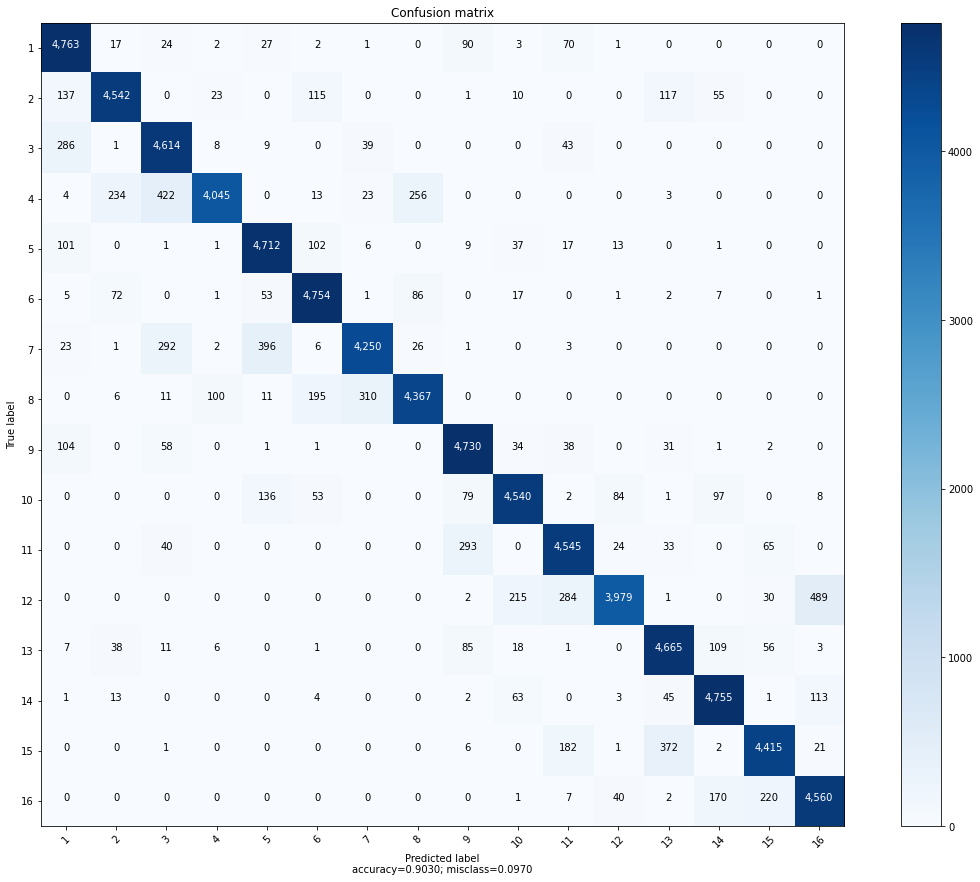

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm1, normalize= False, target_names= labelname)

Matrice de confusion R_Test

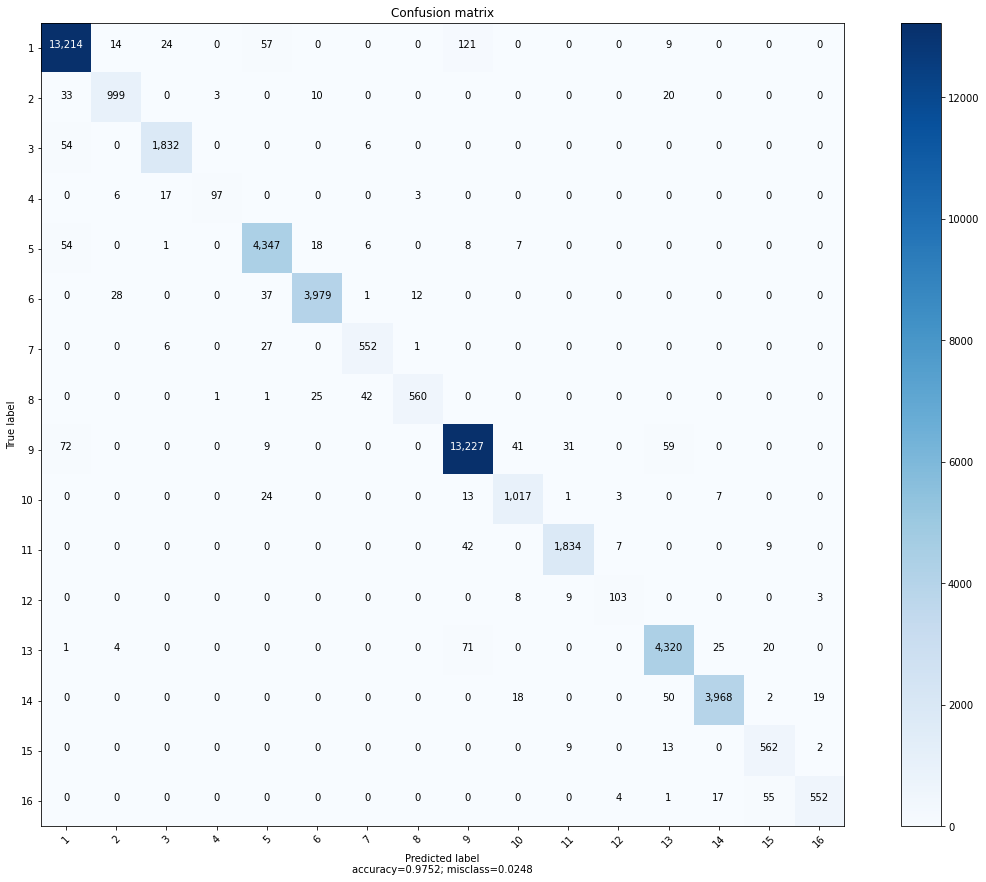

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm2, normalize= False, target_names= labelname)

Matrice de confusion normalisée Well Balanced

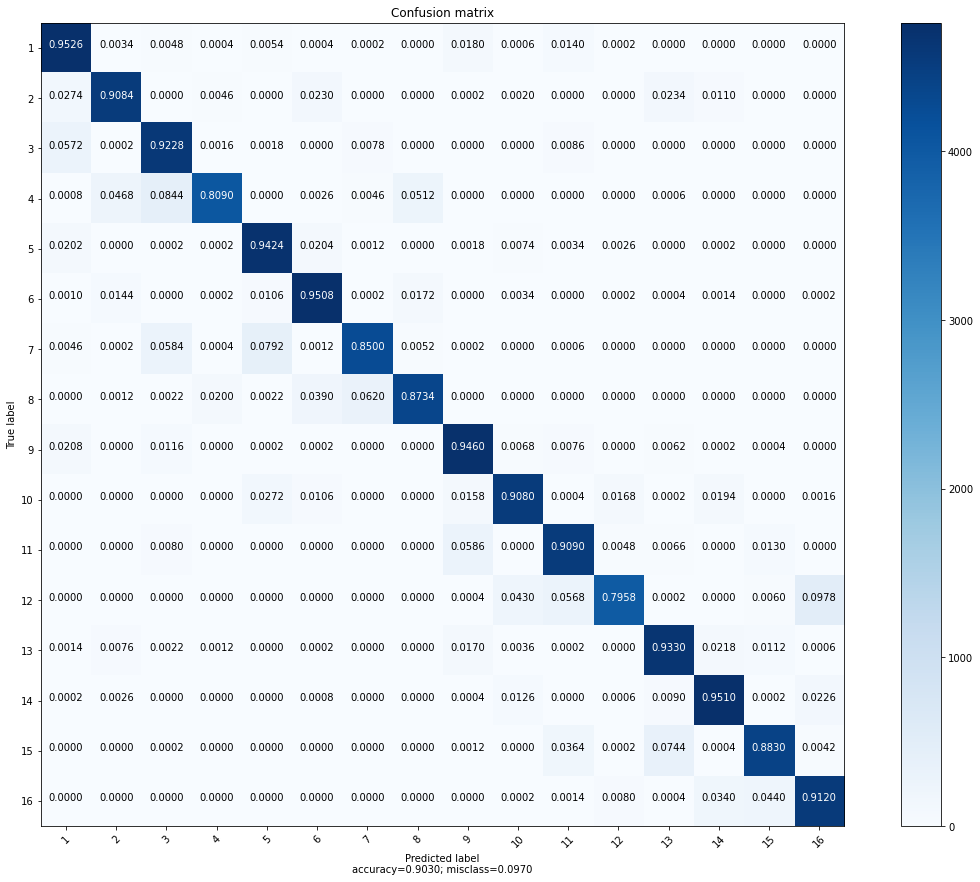

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm1, normalize= True, target_names= labelname)

matrice de confusion normalisée representative

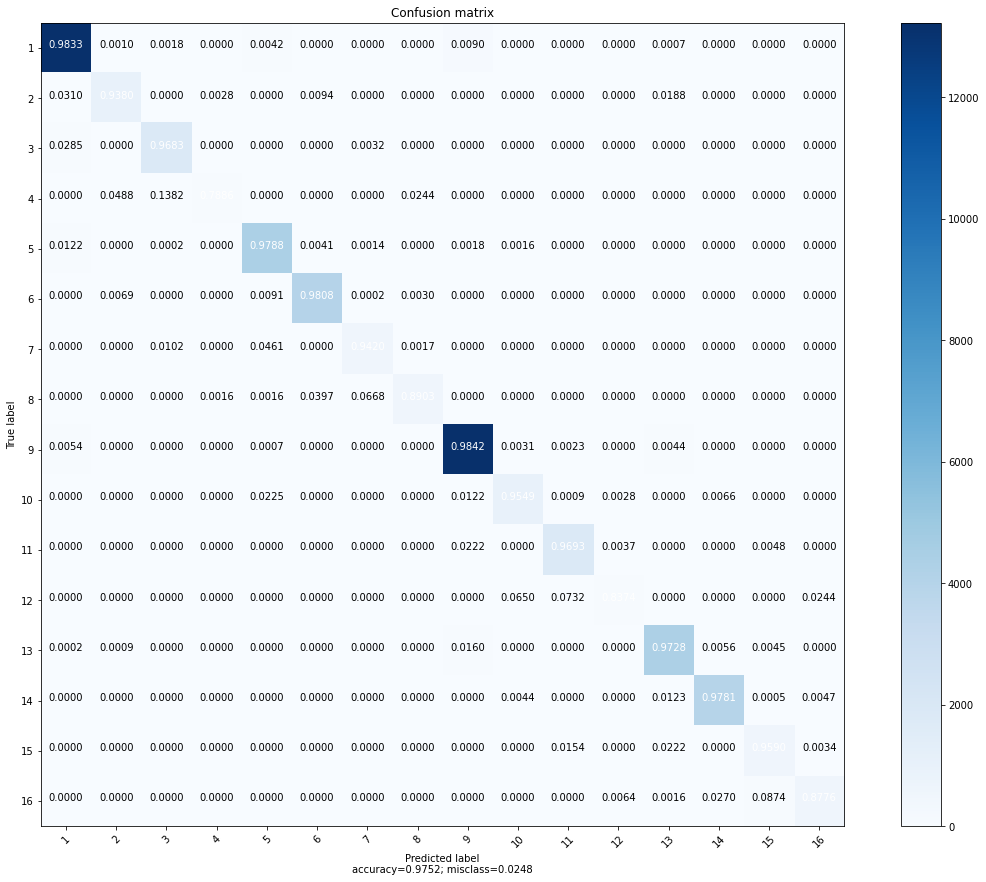

In [ ]:
labelname=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plot_confusion_matrix(cm2, normalize= True, target_names= labelname)